# Clustering

Often, the data you encounter in the real world won't have flags attached and won't provide labeled answers to your question. 

Finding patterns in this type of data, unlabeled data, is a common theme in many machine learning applications.

_Unsupervised Learning_ is how we find patterns and structure in these data.

__Clustering__ is the most well-known unsupervised learing technique. It finds structure in unlabeled data by identifying similar groups, or _clusters_.

Examples of clustering applications are:

* __Recommendation engines__: group products to personalize the user experience
* __Search engines__: group news topics and search results
* __Market segmentation__: group customers based on geography, demography, and behaviors
* __Image segmentation__: medical imaging or road scene segmentation on self-driving cars

## K-Means Clustering

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:
* How many groups do we choose?
* How do we define similarity?

_K-Means_ is the most popualar and well-known clustering algorithm, and it tries to address these two questions. 
* The "K" refers to the number of clusters (groups) we expect to find in a dataset.
* The "Means" refers to the average distance of data to each cluster center, also known as the _centroid_, which we are trying to minimize. 

It is an iterative approach:
1. Place `k` random centroids for the initial clusters. 
2. Assign data samples to the nearest centroid.
3. Upadate centroids based on the above-assigned data samples. 

Repeat Steps 2 and 3 until convergence.

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster.

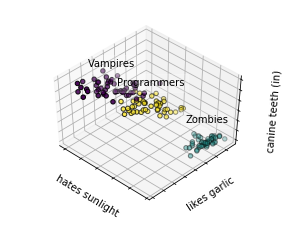

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

from os.path import join, dirname, abspath
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

fignum = 1

# plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Zombies', 0), ('Programmers', 1), ('Vampires', 2)]:
    ax.text3D(x[y == label, 3].mean(), x[y == label, 0].mean(), x[y == label, 2].mean() + 2, name, 
             horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# reoder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('hates sunlight')
ax.set_ylabel('likes garlic')
ax.set_zlabel('canine teeth (in)')

ax.set_title('')
ax.dist = 12

plt.show()

## Iris Dataset

The Iris dataset consists of measurements of sepals and petals of 3 diffirent plant species:
* _Iris setosa_
* _Iris versicolor_
* _Iris virginica_

In [2]:
# import datasets module
from sklearn import datasets

# load the Iris dataset
iris = datasets.load_iris()

# look at the sample data
print(iris.data)

# take a look at the target values
# target values give the ground truth for the dataset
# ground truth, in this case, is the number corresponding to the flower that we are trying to learn
print(iris.target)

# read the descriptions of the data
print(iris.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

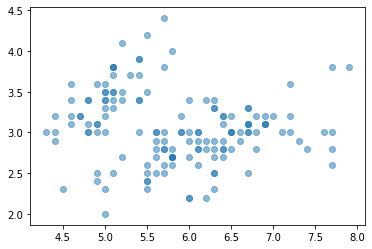

In [3]:
# let's visualize our data
iris = datasets.load_iris()

# store iris.data
samples = iris.data

# create x and y
x = samples[:, 0]
y = samples[:, 1]

# plot x and y
plt.scatter(x, y, alpha=0.5)

# show the plot
plt.show()

# Implementing K-Means
## Step 1. Place `k` random cetroids for the initial clusters

Because we expect there to be three clusters (for the three species of flowers), let's implement K-Means where the `k` is 3.

Using the NumPy library, we will create three _random_ initial centroids and plot them along with our samples.

[[6.35625255 3.7884611 ]
 [7.0542852  3.34673035]
 [5.98047893 3.50475947]]


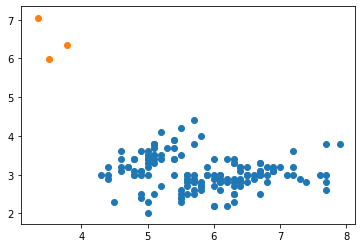

In [4]:
sepal_length_width = np.array(list(zip(x, y)))

# number of clusters
k = 3

# create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), k)

# create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), k)

# create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids)

# make a scatter plot of x, y
plt.scatter(x, y)

# make a scatter plot of the centroids
plt.scatter(centroids_y, centroids_x)

# display plot
plt.show()

## Step 2. Assign data samples to the nearest centroid

Now we have the three random centroids. Let's assign data points to their nearest centroids. 

To do this we're going to use a Distance Formula to write a `distance()` function. Then, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids. 

In [5]:
# distance formula
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one+two) ** 0.5
  return distance

# cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# distances to each centroid
distances = np.zeros(k)

# assign to the closest centroid
for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  cluster = np.argmin(distances)
  labels[i] = cluster

# print labels
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## Step 3. Update centroids based on the above-assigned data samples

Find _new_ cluster centers by taking the average of the assigned points. To find the average of the assigned points, we can use the `.mean()` function.

In [8]:
# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# Distances to each centroid
distances = np.zeros(k)

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# Step 3: Update centroids
centroids_old = deepcopy(centroids)

for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis=0)

print(centroids_old)
print(centroids)

[[6.12023453 3.97759151]
 [4.95912896 2.92873492]
 [4.80579734 2.28129142]]
[[6.53030303 3.17727273]
 [5.29722222 3.07222222]
 [5.34166667 2.30833333]]


## Step 4. Repeat Steps 2 and 3 until convergence

This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

We can do this using a `while` loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the `while` loop, we need to create an array named `errors`. In each `error` index, we calculate the difference between the updated centroid (`centroids`) and the old centroid (`centroids_old`).

The loop ends when all three values in `errors` are `0`.

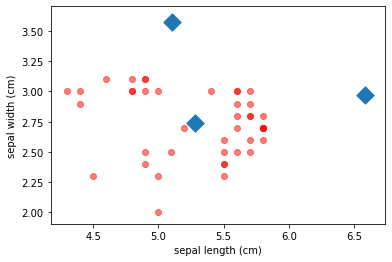

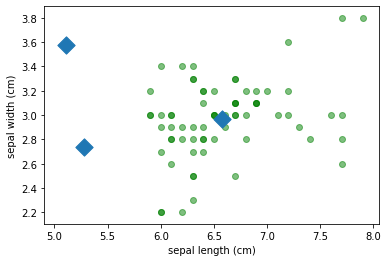

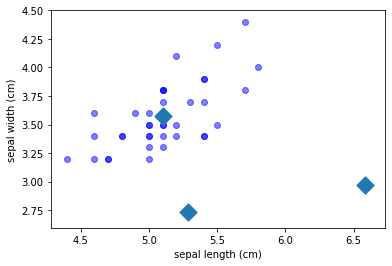

In [9]:
iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# to store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# initialize error:
error = np.zeros(3)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

while error.all() != 0:
  # Step 2: Assign samples to nearest centroid
  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

# Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
    error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1], centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])


colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.show()

# Implementing K-Means Scikit-Learn

Instead of implementing K-Means from scratch, the `sklearn.cluster` module has many methods that can do this for you. 

For Step 1, use the `KMeans()` method to build a model that finds `k` clusters. To specify the number of clusters (`k`), use the `n_clusters` keyword argument:

`model = KMeans(n_clusters = k)`

For Steps 2 and 3, use the `.fit()` method to compute K-Means clustering:

`model.fit(X)`

After K-Means, we can now predict the closest cluster each sample in X belongs to. Use the `.predict()` method to compute cluster centers and predict cluster index for each sample:

`model.predict(X)`

In [10]:
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

target = iris.target

# use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters=3)

# use .fit() to fit the model to samples
model.fit(samples)

# use .predict() to determine the labels of samples
labels = model.predict(samples) 

# print the labels
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Since you have created a model that computed K-Means clustering, you can now feed _new_ data samples into it and obtain the cluster labels using the `.predict()` method.

In [11]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

# predict labels for the new_samples
new_labels = model.predict(new_samples)
print(new_labels)

[0 1 1]


Those are the predicted labels for our three new flowers. Since the cluster centroids are randomly initialized, running the model repeatedly can produce different clusters with the same input data.

Let's make a scatter plot of the data again.

Text(0, 0.5, 'sepal width (cm)')

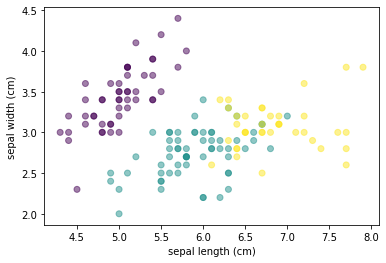

In [12]:
x = samples[:, 0]
y = samples[:, 1]

plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

## Evaluation

Do clusters correspond to the actual species? Let's find out.

Iris dataset comes with target values:

`target = iris.target`

According to the metadata:
* All the `0`'s are _Iris-setosa_
* All the `1`'s are _Iris-versicolor_
* All the `2`'s are _Iris-virginica_

Let's change these values into the corresponding species.

In [13]:
import pandas as pd

species = np.chararray(target.shape, itemsize=150)

for i in range(len(samples)):
    if target[i] == 0:
        species[i] == 'setosa'
    elif target[i] == 1:
        species[i] == 'versicolor'
    elif target[i] == 2:
        species[i] == 'virginica'

Now we are going to use the Pandas to perform a _cross-tabulation_.

Cross tabulation enable you to examine relationships within the data that might not be readily apparanent when analyzing total survey responses.

In [14]:
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

     labels species
0         0     b''
1         0     b''
2         0     b''
3         0     b''
4         0     b''
..      ...     ...
145       2     b''
146       1     b''
147       2     b''
148       2     b''
149       1     b''

[150 rows x 2 columns]


In [15]:
# use the crosstab() method to perform cross-tabulation
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b''
labels      
0         50
1         62
2         38


## The Number of Clusters

At this point, we have grouped the Iris plants into 3 clusters. But suppose we didn't know there are three species of Iris in the dataset, what is the best number of clusters? And how do we determine that?

_Good clustering_ results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are in measured by _inertia_. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has done. 

The goal is to have low inertia _and_ the least number of clusters.

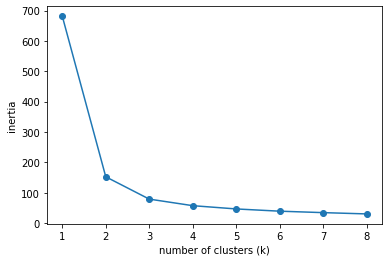

In [16]:
num_clusters = list(range(1, 9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')

plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

plt.show()

One of the ways to interpret this graph is to use the *elbow method*: choose an "elbow" in the inertia plot — when inertia begins to decrease more slowly. 